In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataDesc = pd.read_csv("./data_description.csv")
dataset = pd.read_csv("./train.csv")
pd.set_option('display.max_colwidth', -1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
dataset.iloc[-1]

job_level                                JG04     
job_duration_in_current_job_level        2.82843  
person_level                             PG04     
job_duration_in_current_person_level     2.12132  
job_duration_in_current_branch           1.47309  
Employee_type                            RM_type_B
gender                                   2        
age                                      1980     
marital_status_maried(Y/N)               Y        
number_of_dependences                    2        
Education_level                          level_5  
GPA                                      3.14     
year_graduated                           2009     
job_duration_from_training               14       
branch_rotation                          5        
job_rotation                             7        
assign_of_otherposition                  0        
annual leave                             2        
sick_leaves                              0        
Last_achievement_%             

## Data Column Description

In [4]:
dataDesc

,Kolom,Keterangan
0,job_level,Level Jabatan Pekerja
1,job_duration_in_current_job_level,Masa Kerja pada job level saat ini
2,person_level,Level personal Pekerja
3,job_duration_in_current_person_level,Masa Kerja pada person level saat ini
4,job_duration_in_current_branch,Masa Kerja pada unit kerja saat ini
5,Employee_type,"Tipe Pekerja ( 3 tipe Relationship Manager, tipe A, B , dan C)"
6,gender,Jenis Kelamin
7,age,Usia
8,marital_status_maried(Y/N),Status Pernikahan (Y / N)
9,number_of_dependences,Jumlah anak dalam tanggungan


In [5]:
dataset.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [6]:
dataset.info()
print("Number of employees in the dataset: "+str(len(dataset.index)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

## Missing Values

In [7]:
dataset.isnull().any()

job_level                                False
job_duration_in_current_job_level        False
person_level                             False
job_duration_in_current_person_level     False
job_duration_in_current_branch           False
Employee_type                            False
gender                                   False
age                                      False
marital_status_maried(Y/N)               False
number_of_dependences                    False
Education_level                          False
GPA                                      False
year_graduated                           False
job_duration_from_training               False
branch_rotation                          False
job_rotation                             False
assign_of_otherposition                  False
annual leave                             False
sick_leaves                              False
Last_achievement_%                       True 
Achievement_above_100%_during3quartal    True 
Best Performa

In [8]:
dataset[dataset.isnull().any(axis=1)]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


There is only 1 row of data that contains a missing value. That is 0.00008967001% of the data so we could just drop it and it still won't affect the integrity and the accuracy of the dataset.

In [9]:
dataset.dropna(inplace=True)

## Data Exploration

#### Education Level & GPA

In [10]:
eduBackground = dataset['Education_level'].tolist()
eduBackground = [i.lstrip('level_') for i in eduBackground]
dataset['Education_level'] = pd.Series(eduBackground)

In [11]:
dataset['Education_level'].fillna('5', inplace=True)

In [12]:
dataset['Education_level'] = dataset['Education_level'].astype(int)

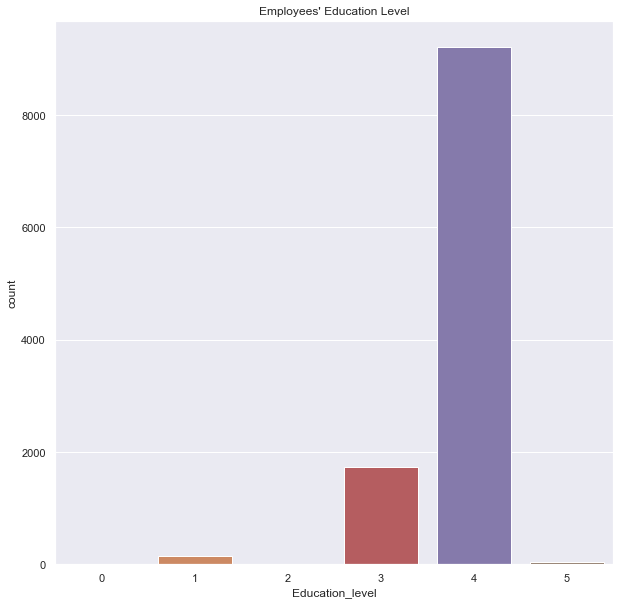

In [13]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x="Education_level", data=dataset)
plt.title("Employees' Education Level")
plt.show()

The most number of employees have an education background of 4. 

In [14]:
dataset['Education_level'].value_counts()

4    9222
3    1741
1    140 
5    44  
2    4   
0    1   
Name: Education_level, dtype: int64

Least number of employees is from education level of 0.

In [15]:
pd.set_option('display.max_rows', 10)
dataset['GPA'].value_counts()

0.00     2148
3.00     382 
3.01     229 
3.10     199 
3.03     186 
        ...  
75.00    1   
2.31     1   
2.54     1   
22.00    1   
2.10     1   
Name: GPA, Length: 216, dtype: int64

I don't think the GPA is a reliable data for us to use to analyze the person as it is very inaccurate. Assuming that those with GPAs of 0.00 means that it is not inputted and that GPAs above 5.00 are inputted incorrectly:

In [16]:
gpa = dataset['GPA'].tolist()
for n, i in enumerate(gpa):
    if i >= 5.00 or i == 0.00:
        gpa[n] = np.nan
dataset['GPA'] = pd.Series(gpa)

In [17]:
(print("Percentage of missing values in column GPA: "
       +str((dataset['GPA'].isnull().sum())/len(dataset.index)*100)
       +("%")))

Percentage of missing values in column GPA: 19.727403156384504%


Since the percentage of missing values is less than 85%, I shouldn't drop the GPA column and I would be replacing the missing values with the mean of the GPA column.

In [18]:
dataset['GPA'].fillna('3.14', inplace=True)

#### Job Level & Employee Type

In [19]:
dataset['job_level'].value_counts()

JG04    10412
JG05    704  
JG03    36   
Name: job_level, dtype: int64

In [20]:
jobLevel = dataset['job_level'].tolist()
jobLevel = [i[-1] for i in jobLevel]
dataset['job_level'] = pd.Series(jobLevel)

In [21]:
dataset['job_level'].fillna('4', inplace=True)

In [22]:
dataset['job_level'] = dataset['job_level'].astype('int')

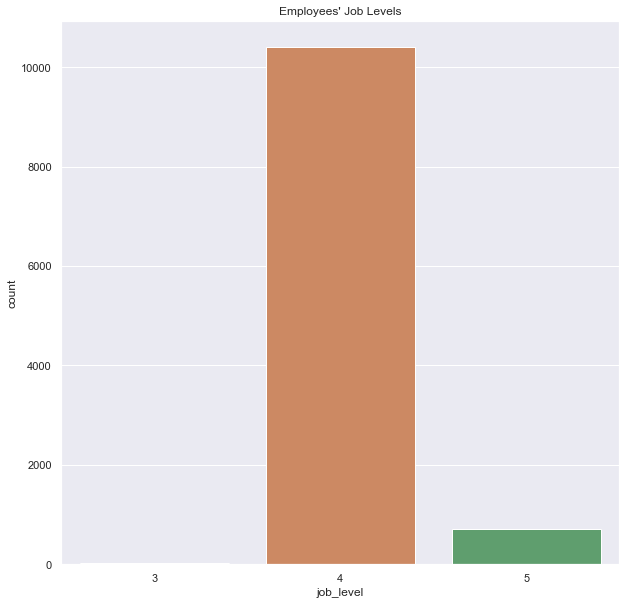

In [23]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x="job_level", data=dataset)
plt.title("Employees' Job Levels")
plt.show()

In [24]:
dataset.groupby("job_level")['Last_achievement_%'].mean()

job_level
3    66.918889
4    71.996452
5    76.033366
Name: Last_achievement_%, dtype: float64

Position 5 has the best performance and position 3 has the worst performance over the last 3 months.

In [25]:
dataset['Employee_type'].value_counts()

RM_type_A    7286
RM_type_B    3380
RM_type_C    486 
Name: Employee_type, dtype: int64

This column has to be OneHotEncoded for ML purposes.

#### Person Level

In [26]:
dataset['person_level'].value_counts()

PG03    9654
PG04    757 
PG06    378 
PG05    308 
PG07    19  
PG01    19  
PG02    16  
PG08    1   
Name: person_level, dtype: int64

In [27]:
personLevel = dataset['person_level'].tolist()
personLevel = [i.lstrip("PG0") for i in personLevel]
dataset['person_level'] = pd.Series(personLevel)

In [28]:
dataset['person_level'].fillna('4', inplace=True)

In [29]:
dataset['person_level'] = dataset['person_level'].astype('int')

#### Gender & Age

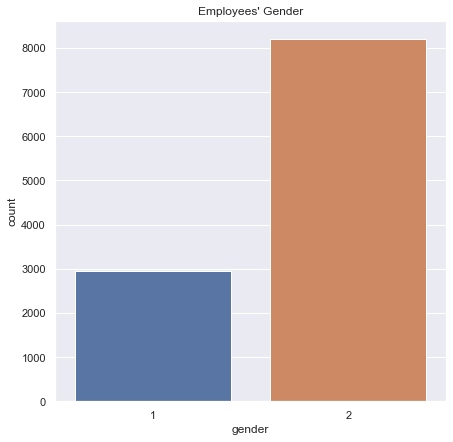

In [30]:
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x="gender", data=dataset)
plt.title("Employees' Gender")
plt.show()

In [31]:
age = dataset['age'].tolist()
age = [2020-i for i in age]
dataset['age'] = pd.Series(age)

In [32]:
dataset['age'].fillna('40', inplace=True)

In [33]:
dataset['age'] = dataset['age'].astype('int')

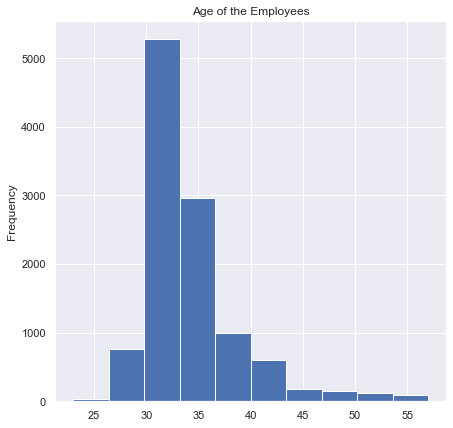

In [34]:
dataset["age"].plot.hist()
plt.title("Age of the Employees")
plt.show()

#### Length of Work

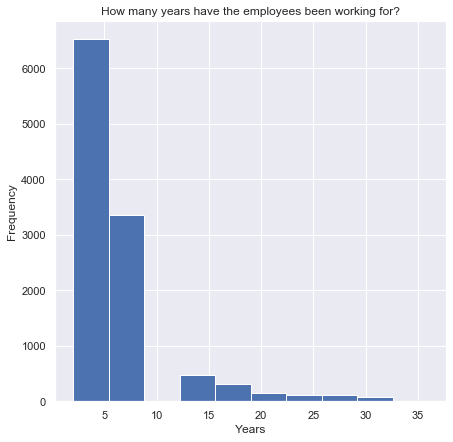

In [35]:
dataset['job_duration_from_training'].plot.hist()
plt.title("How many years have the employees been working for?")
plt.xlabel("Years")
plt.show()

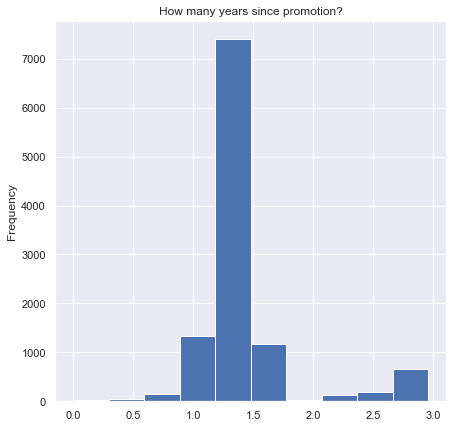

In [36]:
dataset['job_duration_in_current_job_level'].plot.hist()
plt.title("How many years since promotion?")
plt.show()

I can infer that a lot of employees were being promoted quite often in the last 1-1.5 years.

#### Employees' Children & Marital Status

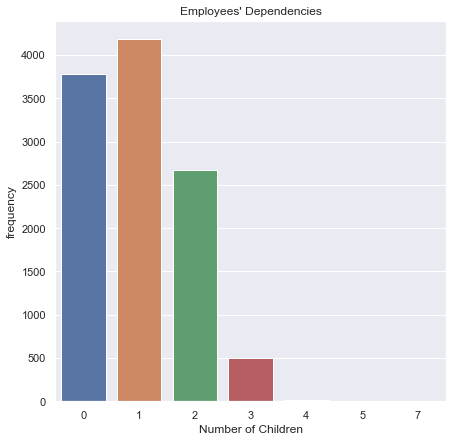

In [37]:
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x="number_of_dependences", data=dataset)
plt.xlabel("Number of Children")
plt.ylabel("frequency")
plt.title("Employees' Dependencies")
plt.show()

In [38]:
(print("Percentage of employees owning children: "
       +str((len(dataset.loc[dataset['number_of_dependences'] >= 1])
             /len(dataset.index))*100)+("%")))

Percentage of employees owning children: 66.12266857962697%


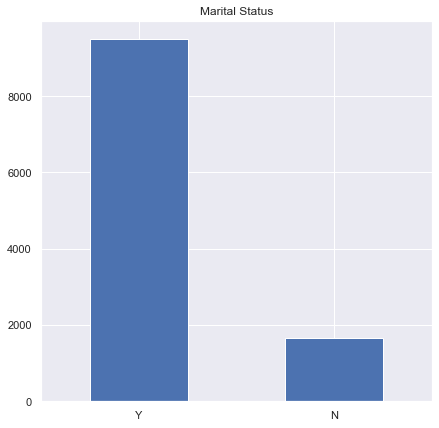

In [39]:
dataset['marital_status_maried(Y/N)'].value_counts().plot.bar()
plt.title("Marital Status")
plt.xticks(rotation=0)
plt.show()

In [40]:
(print("Percentage of married employees: "
       +str((len(dataset.loc[dataset['marital_status_maried(Y/N)'] == "Y"])
             /len(dataset.index))*100)+("%")))

Percentage of married employees: 85.1954806312769%


In [41]:
len(dataset.loc[(dataset["number_of_dependences"] > 0) 
             & (dataset["marital_status_maried(Y/N)"] == 'N')])

0

In [42]:
married = dataset['marital_status_maried(Y/N)'].tolist()
for n, i in enumerate(married):
    if i == 'Y':
        married[n] = 1
    else:
        married[n] = 0
dataset['marital_status_maried(Y/N)'] = pd.Series(married)
dataset['marital_status_maried(Y/N)'].fillna('1', inplace=True)

## Selecting Dependent & Independent Variables

In [43]:
col = list(dataset)
X = dataset[col[0:21]]
y = dataset["Best Performance"]

#### Encoding

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [45]:
X

array([[1.0, 0.0, 0.0, ..., 0, 46.37, 0.0],
       [1.0, 0.0, 0.0, ..., 1, 47.68, 0.0],
       [0.0, 0.0, 1.0, ..., 1, 40.73, 0.0],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 78.38, 0.0],
       [1.0, 0.0, 0.0, ..., 1, 85.94, 1.0],
       [0.0, 1.0, 0.0, ..., 0, 79.99, 1.0]], dtype=object)

## Splitting Train Test

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

## Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Classification

## k-NN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kNNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kNNclassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
y_pred = kNNclassifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2309   57]
 [ 417    5]]


0.8299856527977044

## SVM

In [51]:
from sklearn.svm import SVC
SVMclassifier = SVC(kernel = 'linear', random_state = 0, probability=True)
SVMclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
y_pred = SVMclassifier.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2366    0]
 [ 422    0]]


0.8486370157819225

## Kernel SVM

In [54]:
from sklearn.svm import SVC
kSVMclassifier = SVC(kernel = 'rbf', random_state = 0)
kSVMclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
y_pred = kSVMclassifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2366    0]
 [ 422    0]]


0.8486370157819225

## Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
y_pred = NBclassifier.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2219  147]
 [ 383   39]]


0.8098995695839312

## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [61]:
y_pred = DTclassifier.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2007  359]
 [ 346   76]]


0.7471305595408895

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=500)
RFclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [64]:
y_pred = RFclassifier.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[2365    1]
 [ 422    0]]
0.8482783357245337


## Reading test.csv Data

In [66]:
testData = pd.read_csv('./test.csv')

In [67]:
testData.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,3.34,2007,5,3,2,0,3,0,82.32,0.0


In [68]:
pd.set_option('display.max_rows', None)
testData.iloc[0]

job_level                                JG04     
job_duration_in_current_job_level        1.25698  
person_level                             PG03     
job_duration_in_current_person_level     1.25698  
job_duration_in_current_branch           0.707107 
Employee_type                            RM_type_A
gender                                   1        
age                                      1988     
marital_status_maried(Y/N)               N        
number_of_dependences                    0        
Education_level                          level_3  
GPA                                      3.08     
year_graduated                           2009     
job_duration_from_training               6        
branch_rotation                          4        
job_rotation                             2        
assign_of_otherposition                  6        
annual leave                             3        
sick_leaves                              7        
Last_achievement_%             

Columns that I need to change from test.csv:
1. job_level
2. person_level
3. Employee_type
4. marital_status_maried(Y/N)
5. Education_level

## Test Data Modification

#### Job Level

In [69]:
jobLevel = testData['job_level'].tolist()
jobLevel = [i[-1] for i in jobLevel]
testData['job_level'] = pd.Series(jobLevel)

#### Person Level

In [70]:
personLevel = testData['person_level'].tolist()
personLevel = [i.lstrip("PG0") for i in personLevel]
testData['person_level'] = pd.Series(personLevel)

#### Employee Type

Encoding needed.

#### Marital Status

In [71]:
married = testData['marital_status_maried(Y/N)'].tolist()
for n, i in enumerate(married):
    if i == 'Y':
        married[n] = 1
    else:
        married[n] = 0
testData['marital_status_maried(Y/N)'] = pd.Series(married)

#### Education Level

In [72]:
eduBackground = testData['Education_level'].tolist()
eduBackground = [i.lstrip('level_') for i in eduBackground]
testData['Education_level'] = pd.Series(eduBackground)

## Classification on Test Data

In [73]:
col = list(testData)
testX = testData[col[0:21]]

#### Encode for Employee Type

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
testX = np.array(ct.fit_transform(testX))

#### Feature Scaling

In [75]:
testX = sc.fit_transform(testX)

### Random Forest Classification on Test Data

In [76]:
RFpredictY = RFclassifier.predict(testX)

In [77]:
RFpredictY

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
dfRF = pd.DataFrame(RFpredictY)

In [84]:
dfRF = dfRF.rename(columns={0: 'Best Performance'})

In [87]:
dfRF['Best Performance'].value_counts()

0    5996
1    4   
Name: Best Performance, dtype: int64

In [89]:
dfRF.to_csv (r'./steven_ftw.csv', index = False, header=True)

### SVM Classification on Test Data

In [90]:
SVMpredictY = SVMclassifier.predict(testX)

In [91]:
dfSVM = pd.DataFrame(SVMpredictY)

In [92]:
dfSVM

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [93]:
dfSVM[0].value_counts()

0    6000
Name: 0, dtype: int64

In [ ]:
dataset.head()